In [86]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
nov_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Copy of ZN250 - Monthly Portfolio November 2024.xlsx')

In [116]:
sept_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Copy of ZN250 - Monthly Portfolio September 2024.xlsx')

In [117]:
nov_df.head()

,Name of the Instrument,ISIN,Rating / Industry^,Quantity,Market value\n(Rs. in Lakhs),% to NAV
0,HDFC Bank Limited,INE040A01034,Banks,199490,3582.94,0.050741
1,ICICI Bank Limited,INE090A01021,Banks,185280,2408.83,0.034113
2,Reliance Industries Limited,INE002A01018,Petroleum Products,178357,2304.73,0.032639
3,Infosys Limited,INE009A01021,IT - Software,94650,1758.46,0.024903
4,ITC Limited,INE154A01025,Diversified FMCG,244635,1166.30,0.016517


In [118]:
sept_df.head()

,Name of the Instrument,ISIN,Rating / Industry^,Quantity,Market value\n(Rs. in Lakhs),% to NAV
0,HDFC Bank Limited,INE040A01034,Banks,167135,2894.86,0.046175
1,Reliance Industries Limited,INE002A01018,Petroleum Products,74715,2206.45,0.035194
2,ICICI Bank Limited,INE090A01021,Banks,155231,1976.09,0.031520
3,Infosys Limited,INE009A01021,IT - Software,79299,1487.33,0.023724
4,ITC Limited,INE154A01025,Diversified FMCG,204958,1061.99,0.016939


In [119]:
# Merge the November and September datasets on the 'Name of the Instrument'
merged_df = pd.merge(nov_df[['Name of the Instrument', 'Quantity', 'Market value\n(Rs. in Lakhs)']],
                     sept_df[['Name of the Instrument', 'Quantity', 'Market value\n(Rs. in Lakhs)']],
                     on='Name of the Instrument',
                     suffixes=('_nov', '_sept'))

In [120]:
merged_df.head()

,Name of the Instrument,Quantity_nov,Market value\n(Rs. in Lakhs)_nov,Quantity_sept,Market value\n(Rs. in Lakhs)_sept
0,HDFC Bank Limited,199490,3582.94,167135,2894.86
1,ICICI Bank Limited,185280,2408.83,155231,1976.09
2,Reliance Industries Limited,178357,2304.73,74715,2206.45
3,Infosys Limited,94650,1758.46,79299,1487.33
4,ITC Limited,244635,1166.30,204958,1061.99


In [121]:
# Calculate the changes in Quantity and Market Value
merged_df['Quantity_change'] = merged_df['Quantity_nov'] - merged_df['Quantity_sept']
merged_df['Market_value_change'] = merged_df['Market value\n(Rs. in Lakhs)_nov'] - merged_df['Market value\n(Rs. in Lakhs)_sept']

In [122]:
merged_df.head()

,Name of the Instrument,Quantity_nov,Market value\n(Rs. in Lakhs)_nov,Quantity_sept,Market value\n(Rs. in Lakhs)_sept,Quantity_change,Market_value_change
0,HDFC Bank Limited,199490,3582.94,167135,2894.86,32355,688.08
1,ICICI Bank Limited,185280,2408.83,155231,1976.09,30049,432.74
2,Reliance Industries Limited,178357,2304.73,74715,2206.45,103642,98.28
3,Infosys Limited,94650,1758.46,79299,1487.33,15351,271.13
4,ITC Limited,244635,1166.30,204958,1061.99,39677,104.31


In [132]:
import pandas as pd
from datetime import datetime, timedelta

def track_mutual_fund_changes(nov_df, sept_df):
    
    fund_names_input = input("Enter the fund names (comma-separated, e.g., 'Zerodha Midcap Fund, HDFC Large Cap'): ")

    
    months_input = int(input("Enter the number of months to look back (e.g., '5' for last 5 months): "))

    
    fund_names_input = [fund.strip() for fund in fund_names_input.split(",")]

    
    result = []

    
    end_date = datetime.today()
    start_date = end_date - timedelta(days=months_input * 30)  # Approximate days for N months
    start_date_str = start_date.strftime('%Y-%m')
    end_date_str = end_date.strftime('%Y-%m')

    
    for fund_name_input in fund_names_input:
        # Filter the datasets (both November and September data)
        filtered_nov_df = nov_df[nov_df['Name of the Instrument'].str.contains(fund_name_input, case=False, na=False)]
        filtered_sept_df = sept_df[sept_df['Name of the Instrument'].str.contains(fund_name_input, case=False, na=False)]

        if not filtered_nov_df.empty and not filtered_sept_df.empty:
            # Calculate the changes in Quantity and Market Value
            merged_df = pd.merge(filtered_sept_df, filtered_nov_df, on='Name of the Instrument', suffixes=('_sept', '_nov'))
            merged_df['Quantity_change'] = merged_df['Quantity_nov'] - merged_df['Quantity_sept']
            merged_df['Market_value_change'] = merged_df['Market value\n(Rs. in Lakhs)_nov'] - merged_df['Market value\n(Rs. in Lakhs)_sept']

           
            merged_df['Quantity_change_description'] = merged_df['Quantity_change'].apply(
                lambda x: "Increased" if x > 0 else ("Decreased" if x < 0 else "No change"))
            merged_df['Market_value_change_description'] = merged_df['Market_value_change'].apply(
                lambda x: "Increased" if x > 0 else ("Decreased" if x < 0 else "No change"))

            
            result.append(f"\nChanges for {fund_name_input} (from {start_date_str} to {end_date_str}):\n")
            for index, row in merged_df.iterrows():
                result.append(f"{row['Name of the Instrument']:<30}Quantity: {row['Quantity_change_description']:<10} "
                              f"({row['Quantity_change']:<20})  Market Value: {row['Market_value_change_description']:<10} "
                              f"({row['Market_value_change']:<20})")
        else:
            result.append(f"\nNo data found for {fund_name_input}.\n")

    
    print("\n".join(result))

   
    output_file = '/content/drive/MyDrive/fund_changes_output.csv'
    merged_df.to_csv(output_file, index=False)  # Save merged data if needed

    print(f"\nThe changes have been saved to {output_file}")




track_mutual_fund_changes(nov_df, sept_df)


Enter the fund names (comma-separated, e.g., 'Zerodha Midcap Fund, HDFC Large Cap'): ICICI Bank Limited	
Enter the number of months to look back (e.g., '5' for last 5 months): 3

Changes for ICICI Bank Limited (from 2024-10 to 2025-01):

ICICI Bank Limited            Quantity: Increased  (30049               )  Market Value: Increased  (432.74              )

The changes have been saved to /content/drive/MyDrive/fund_changes_output.csv


Enter the fund names (comma-separated, e.g., 'Zerodha Midcap Fund, HDFC Large Cap'): ICICI Bank Limited
Enter the number of months to look back (e.g., '5' for last 5 months): 3
Do you want to see the future trend predictions for these funds? (yes/no): yes


<ipython-input-145-6ca51c73a33a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_nov_df.loc[:, 'Month'] = 'November 2024'
<ipython-input-145-6ca51c73a33a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sept_df.loc[:, 'Month'] = 'September 2024'



Changes for ICICI Bank Limited (from 2024-10 to 2025-01):
Quantity Change: 30049.00
Market Value Change: 432.74

Prediction for ICICI Bank Limited: The fund is predicted to increase in the future.
Trend Summary: Over the last 3 months, the fund has shown a increase in quantity.
Do you want to see the trend plot for ICICI Bank Limited? (yes/no): yes


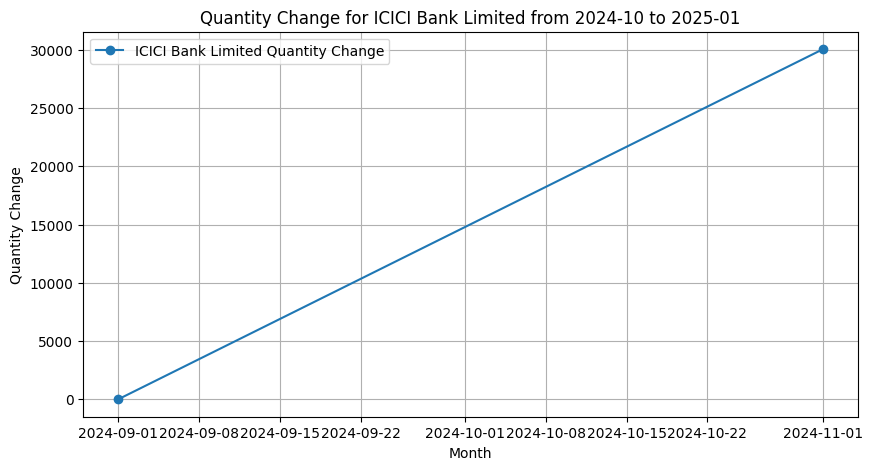

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import numpy as np

def track_mutual_fund_changes_with_prediction(nov_df, sept_df):
    # User inputs for date range
    fund_names_input = input("Enter the fund names (comma-separated, e.g., 'Zerodha Midcap Fund, HDFC Large Cap'): ")
    months_input = int(input("Enter the number of months to look back (e.g., '5' for last 5 months): "))
    fund_names_input = [fund.strip() for fund in fund_names_input.split(",")]

    # Ask user if they want to see the future trend predictions
    view_future_trends = input("Do you want to see the future trend predictions for these funds? (yes/no): ").strip().lower()

    # Calculate the date range based on months input
    end_date = datetime.today()
    start_date = end_date - timedelta(days=months_input * 30)
    start_date_str = start_date.strftime('%Y-%m')
    end_date_str = end_date.strftime('%Y-%m')

    # Loop through each fund name provided by the user
    for fund_name_input in fund_names_input:
        filtered_nov_df = nov_df[nov_df['Name of the Instrument'].str.contains(fund_name_input, case=False, na=False)]
        filtered_sept_df = sept_df[sept_df['Name of the Instrument'].str.contains(fund_name_input, case=False, na=False)]

        if not filtered_nov_df.empty and not filtered_sept_df.empty:
            # Adding a hypothetical "Month" column to simulate the time range using .loc to avoid warnings
            filtered_nov_df.loc[:, 'Month'] = 'November 2024'
            filtered_sept_df.loc[:, 'Month'] = 'September 2024'

            # Merging the data for both months
            merged_df = pd.concat([filtered_sept_df[['Name of the Instrument', 'Quantity', 'Market value\n(Rs. in Lakhs)', 'Month']],
                                   filtered_nov_df[['Name of the Instrument', 'Quantity', 'Market value\n(Rs. in Lakhs)', 'Month']]])

            # Sorting the data by Month to plot correctly
            merged_df['Month'] = pd.to_datetime(merged_df['Month'], format='%B %Y')
            merged_df = merged_df.sort_values(by='Month')

            # Calculate the change in Quantity and Market Value
            merged_df['Quantity_change'] = merged_df.groupby('Name of the Instrument')['Quantity'].diff().fillna(0)
            merged_df['Market_value_change'] = merged_df.groupby('Name of the Instrument')['Market value\n(Rs. in Lakhs)'].diff().fillna(0)

            # Prepare the data for trend prediction
            merged_df['MonthNumber'] = np.arange(1, len(merged_df) + 1)

            # Linear Regression Model for predicting trend (increase or decrease)
            X = merged_df[['MonthNumber']].values  # Features (MonthNumber) as numpy array
            y_quantity = merged_df['Quantity_change'].values  # Target variable (Quantity Change) as numpy array

            # Fit the model
            model_quantity = LinearRegression()
            model_quantity.fit(X, y_quantity)

            # Predict whether the fund will increase or decrease (based on the trend in the last months)
            prediction = model_quantity.predict(np.array([[len(merged_df) + 1]]))

            # Generate the trend prediction and summary
            if prediction > 0:
                trend_prediction = "increase"
            elif prediction < 0:
                trend_prediction = "decrease"
            else:
                trend_prediction = "no significant change"

            # Trend summary for the last few months
            trend_summary = f"Over the last {months_input} months, the fund has shown a {trend_prediction} in quantity."

            # Fund changes (show the changes in quantity and market value)
            print(f"\nChanges for {fund_name_input} (from {start_date_str} to {end_date_str}):")
            print(f"Quantity Change: {merged_df['Quantity_change'].iloc[-1]:.2f}")
            print(f"Market Value Change: {merged_df['Market_value_change'].iloc[-1]:.2f}")

            # Prediction and Trend Summary
            if view_future_trends == "yes":
                print(f"\nPrediction for {fund_name_input}: The fund is predicted to {trend_prediction} in the future.")
                print(f"Trend Summary: {trend_summary}")
            else:
                print(f"\nNo trend prediction displayed as per user choice.")

            # Ask if the user wants to see the trend plot
            show_trend_plot = input(f"Do you want to see the trend plot for {fund_name_input}? (yes/no): ").strip().lower()

            # Visualize the trend if requested
            if show_trend_plot == "yes":
                plt.figure(figsize=(10, 5))
                plt.plot(merged_df['Month'], merged_df['Quantity_change'], marker='o', label=f'{fund_name_input} Quantity Change')
                plt.title(f'Quantity Change for {fund_name_input} from {start_date_str} to {end_date_str}')
                plt.xlabel('Month')
                plt.ylabel('Quantity Change')
                plt.legend()
                plt.grid(True)
                plt.show()

        else:
            print(f"No data found for {fund_name_input}.")

# Call the function to ask for user input and display the results
track_mutual_fund_changes_with_prediction(nov_df, sept_df)
